In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib as mpl # 그래프 옵션
import matplotlib.pyplot as plt # 그래프 출력

import seaborn as sns

# 그래프 설정 한글폰트
if os.name == 'nt': # 윈도우 사용자
    mpl.rc('font', family = 'Malgun Gothic')
elif os.name == 'posix': # 맥 사용자
    mpl.rc('font', family = 'AppleGothic')
else:
    print('check your os')
    
# 그래프의 한글을 선명하게
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프에서 음수값 나올 때, 깨지는 현상 방지
mpl.rc('axes', unicode_minus = False)

import warnings
warnings.filterwarnings('ignore')

C:\Users\user\AppData\Local\Temp/ipykernel_16192/3489849483.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
path = 'C:/Users/user/Desktop/TodayLearn/TiL/Code/data'

df_raw = pd.read_csv(f'{path}/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv')

df_raw.shape

(91335, 39)

In [3]:
df_raw.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4.0,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5.0,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1.0,NaN,127.095522,37.323528


In [4]:
df_seoul_hospital = df_raw[(df_raw['상권업종소분류명'] == '종합병원') & (df_raw['시도명'] == '서울특별시')]

In [5]:
df_seoul_hospital['시군구명'].value_counts(normalize = True)

강남구     0.164835
영등포구    0.087912
광진구     0.065934
서초구     0.065934
강동구     0.054945
중구      0.054945
송파구     0.054945
강북구     0.043956
도봉구     0.043956
서대문구    0.043956
양천구     0.043956
성북구     0.032967
강서구     0.021978
중랑구     0.021978
종로구     0.021978
동대문구    0.021978
구로구     0.021978
노원구     0.021978
금천구     0.021978
성동구     0.021978
관악구     0.021978
동작구     0.010989
마포구     0.010989
용산구     0.010989
은평구     0.010989
Name: 시군구명, dtype: float64

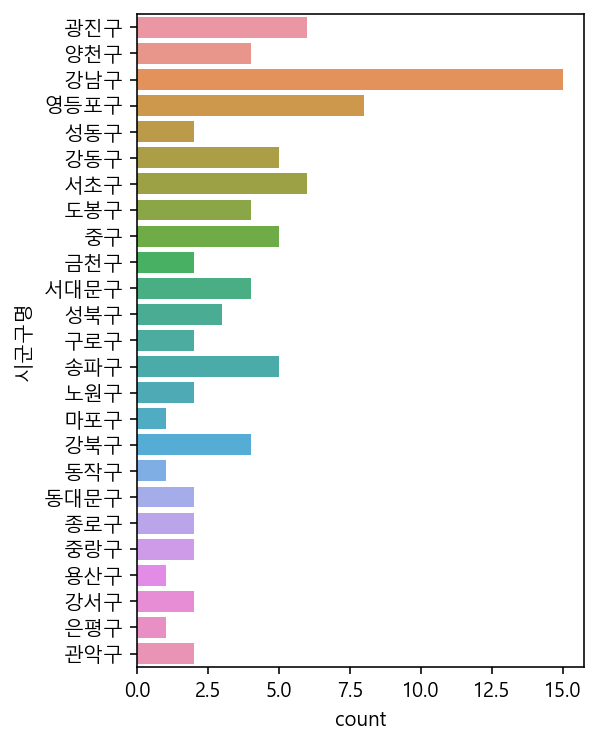

In [6]:
plt.figure(figsize = (4,6))
sns.countplot(data = df_seoul_hospital, y = '시군구명')
plt.show()

In [7]:
df_seoul_hospital['상호명'].str.contains('종합병원')

305      False
353      False
385      False
1917     False
2461     False
         ...  
71991    False
76508    False
90492    False
90581    False
90788    False
Name: 상호명, Length: 91, dtype: bool

In [8]:
# 텍스트 데이터 색인학시
df_seoul_hospital.loc[~df_seoul_hospital['상호명'].str.contains('종합병원'), '상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [9]:
# 상호명에서 특정 단어가 있는 것을 추출 -꽃배달
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('꽃배달')]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700105510000017194,NaN,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,1,1.0,NaN,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700105470006016762,이이빌딩,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,NaN,1.0,NaN,127.001756,37.499095


In [10]:
# 장례식장, 의원, 꽃배달, 어린이집, 상담소가 들어가 있는 상호명을 제거
drop_row = df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('꽃배달|의료기기|장례식장|상담소|의원|어린이집')].info
drop_row = drop_row.tolist

AttributeError: 'function' object has no attribute 'tolist'

In [44]:
#df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis = 0) # 행을 기주능로 제거(index를 기준으로 삭제)

In [48]:
print(df_seoul_hospital.shape)
print(df_seoul_hospital.shape)
df_seoul_hospital

(91, 39)
(91, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
305,25155642,대진의료재단,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1121510100100580025000733,재단법인대순진리회,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,NaN,NaN,NaN,127.088279,37.559048
353,20471487,홍익병원별관,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1147010100108970013001044,홍익병원별관,서울특별시 양천구 국회대로 250,158070.0,7937.0,NaN,1.0,NaN,126.862805,37.529213
385,20737057,SNUH,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1168010100107360055027688,성보빌딩,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,NaN,4.0,NaN,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156011000100620000031477,여의도성모병원,서울특별시 영등포구 63로 10,150713.0,7345.0,NaN,1.0,NaN,126.936693,37.518296
2461,20024045,한양,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1120010700100150001019623,한대동문회관,서울특별시 성동구 마조로 22-2,133070.0,4763.0,NaN,4.0,NaN,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,응급의료센터,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700101230000017226,가톨릭대학교성의교정,서울특별시 서초구 반포대로 222,137701.0,6591.0,NaN,1,NaN,127.005841,37.502382
76508,12292992,라마르의원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1174010900104530021010314,원방빌딩,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,NaN,NaN,NaN,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1114012700100010001019574,명동성당,서울특별시 중구 명동길 74,100809.0,4537.0,NaN,NaN,NaN,126.986758,37.563662
90581,16332576,씨엠병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156010500100900000035097,충무병원,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,NaN,NaN,NaN,126.903857,37.518807


In [47]:
plt.figure(figsize = (15, 4))
sns.countplot(df_seoul_hospital, x = '시군구명', order = df_seoul_hospital['시군구명'].value_counts())
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1080x288 with 0 Axes>

1. 라이브러리 호출하기
2. 데이터 요약적으로 확인하기(type, shape, describe)
3. 데이터 색인하기
4. 데이터 검증하기(색인한 데이터들이 잘 정리되어 있는지 확인)
5. 데이터 시각화하기

# 위경도 데이터의 시각화

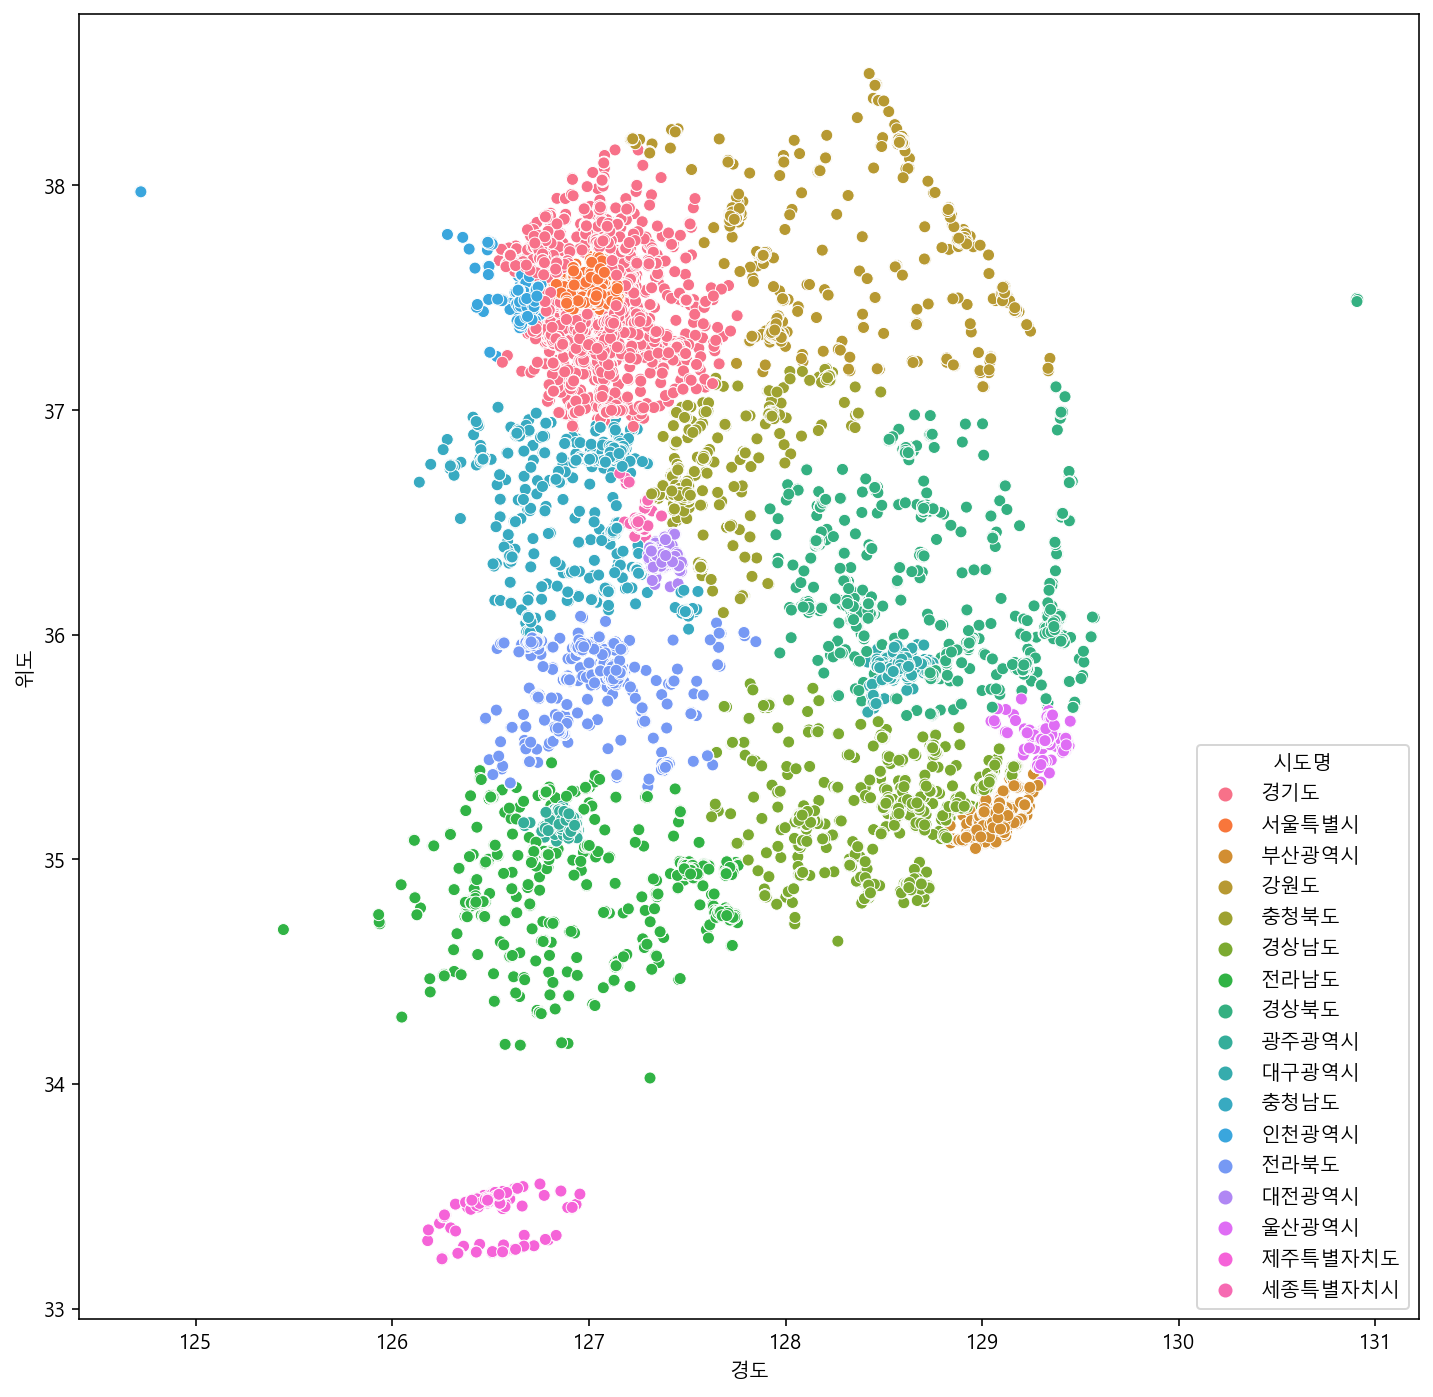

In [11]:
plt.figure(figsize = (12, 12))
sns.scatterplot(data = df_raw, x = '경도', y = '위도', hue = '시도명')
plt.show()

In [13]:
# 서울시 데이터 색인
df_seoul = df_raw[df_raw['시도명'] == '서울특별시']

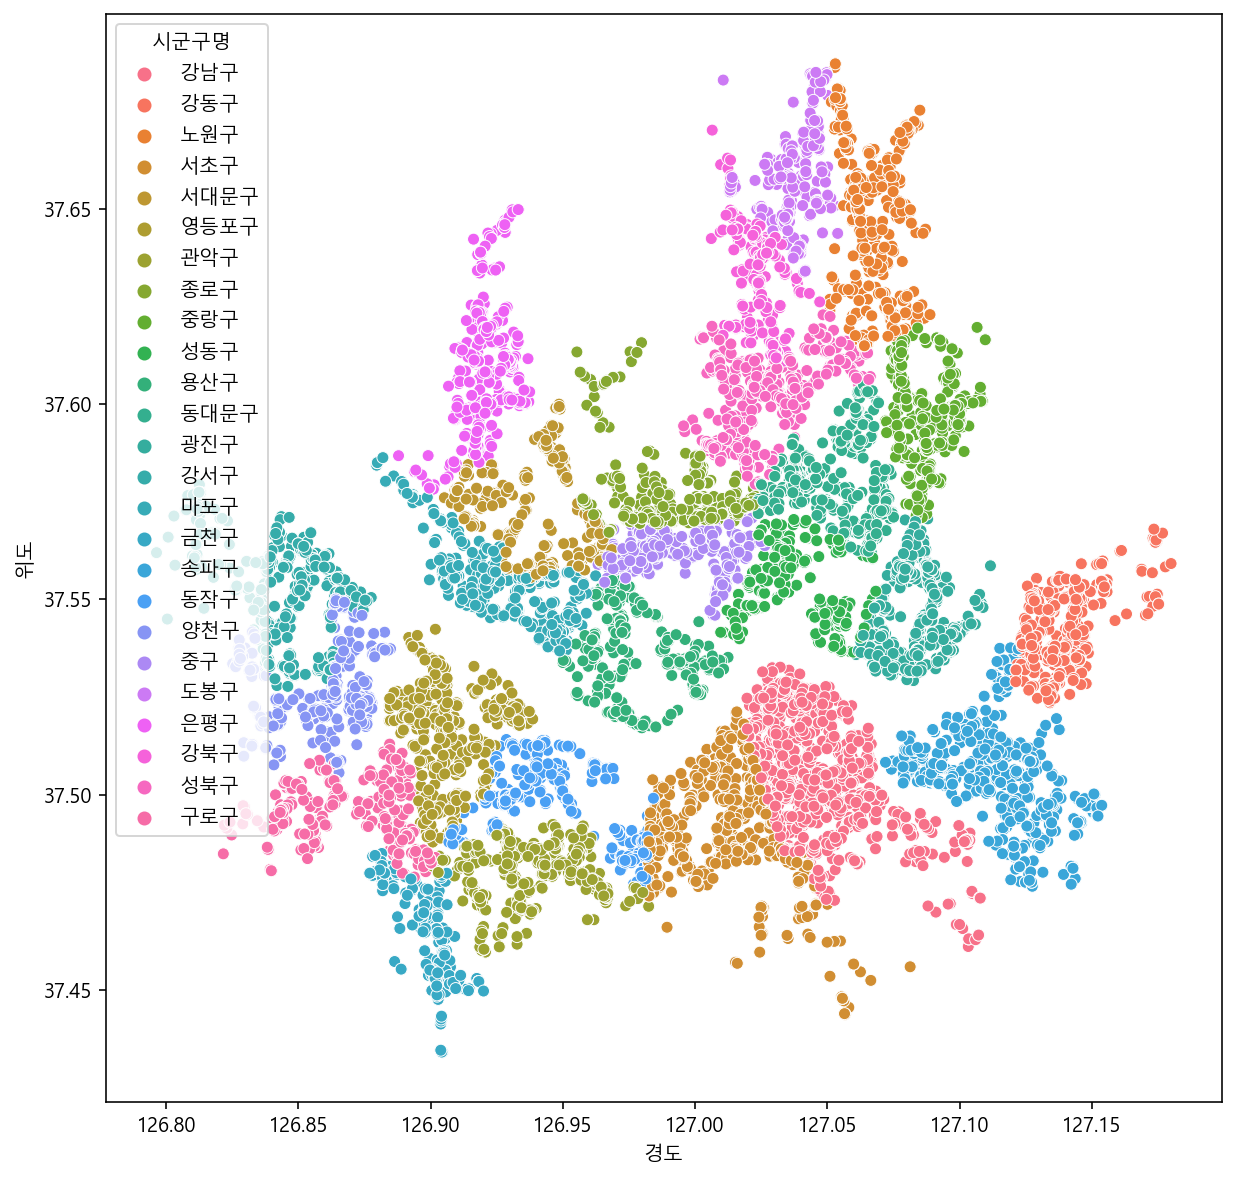

In [14]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = df_seoul, x = '경도', y = '위도' , hue = '시군구명')
plt.show()

In [67]:
import folium

folium.Map()

In [77]:
# 지도의 중심좌표 설정
map = folium.Map(location = [df_seoul_hospital['위도'].mean(), df_seoul_hospital['경도'].mean()], zoom_start = 16)

for i in df_seoul_hospital.index :
    name =df_seoul_hospital.loc[i, '상호명']
    address = df_seoul_hospital.loc[i, '도로명주소']
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[i, '위도'], df_seoul_hospital.loc[i, '경도']] # 위도와 경도를 리스트 형태로 입력
    folium.Marker(
    location = location,
    popup = popup).add_to(map)
# 위경도 좌표를 이용해서 위치 파악이 가능하다.

In [78]:
map